In [1]:
import math

import fresnel
import freud
import gsd.hoomd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.style.use('ggplot')

# What file do we want to analyze
traj = gsd.hoomd.open('../data/20211027/chi_test/simulations/nah0/s0/traj_langevin_postequil.gsd')


OPENMP DISPLAY ENVIRONMENT BEGIN
   _OPENMP='201611'
  [host] OMP_AFFINITY_FORMAT='OMP: pid %P tid %i thread %n bound to OS proc set {%A}'
  [host] OMP_ALLOCATOR='omp_default_mem_alloc'
  [host] OMP_CANCELLATION='FALSE'
  [host] OMP_DEFAULT_DEVICE='0'
  [host] OMP_DISPLAY_AFFINITY='FALSE'
  [host] OMP_DISPLAY_ENV='TRUE'
  [host] OMP_DYNAMIC='FALSE'
  [host] OMP_MAX_ACTIVE_LEVELS='1'
  [host] OMP_MAX_TASK_PRIORITY='0'
  [host] OMP_NESTED: deprecated; max-active-levels-var=1
  [host] OMP_NUM_THREADS: value is not defined
  [host] OMP_PROC_BIND='false'
  [host] OMP_SCHEDULE='static'
  [host] OMP_STACKSIZE='8M'
  [host] OMP_TARGET_OFFLOAD=DEFAULT
  [host] OMP_THREAD_LIMIT='2147483647'
  [host] OMP_TOOL='enabled'
  [host] OMP_TOOL_LIBRARIES: value is not defined
  [host] OMP_TOOL_VERBOSE_INIT: value is not defined
  [host] OMP_WAIT_POLICY='PASSIVE'
OPENMP DISPLAY ENVIRONMENT END




In [2]:
# Constants of conversion in our system
kB = 1.987204259e-3 # kcal/(mol * K)
kTroom = 0.5961 # 1 kT = 0.5961 kcal/mol

In [3]:
traj[0].log

{'particles/md/pair/GrimeLipid/energies': array([ 0.        , -3.41064559, -5.77216427, ..., -4.32485434,
        -8.84812392, -8.48748889]),
 'particles/md/pair/GrimeLipid/forces': array([[  0.        ,   0.        ,   0.        ],
        [-19.46219598,  -5.9182814 ,   0.13080953],
        [ -0.52652475,  -0.32996181, -12.85883152],
        ...,
        [ -5.23211263,   7.64803996,  -0.27366392],
        [  2.90477216,  -6.28944966,  13.84482242],
        [-21.69045696,  38.76478805,   5.34711962]]),
 'md/compute/ThermodynamicQuantities/kinetic_temperature': array([0.99440514]),
 'md/compute/ThermodynamicQuantities/pressure': array([0.00380115]),
 'md/compute/ThermodynamicQuantities/pressure_tensor': array([-0.00053266, -0.00286096, -0.0066853 , -0.0003678 ,  0.00606454,
         0.0123039 ]),
 'md/compute/ThermodynamicQuantities/kinetic_energy': array([119328.61631416]),
 'md/compute/ThermodynamicQuantities/translational_kinetic_energy': array([119328.61631416]),
 'md/compute/Thermo

In [4]:
timestep = []
walltime = []
potential_energy = []
temperature = []
pressure = []

for frame in traj:
    timestep.append(frame.configuration.step)
    walltime.append(frame.log['Simulation/walltime'][0])
    potential_energy.append(
        frame.log['md/compute/ThermodynamicQuantities/potential_energy'][0])
    temperature.append(
        frame.log['md/compute/ThermodynamicQuantities/kinetic_temperature'][0])
    pressure.append(
        frame.log['md/compute/ThermodynamicQuantities/pressure'][0])

temperature_real = np.array(temperature)

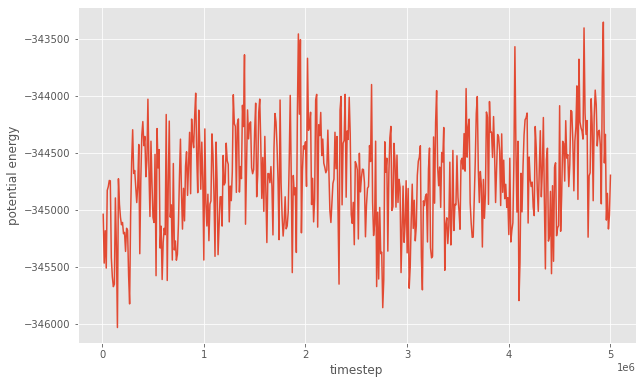

In [5]:
fig = matplotlib.figure.Figure(figsize=(10, 6.18))
ax = fig.add_subplot()
ax.plot(timestep, potential_energy)
ax.set_xlabel('timestep')
ax.set_ylabel('potential energy')
fig

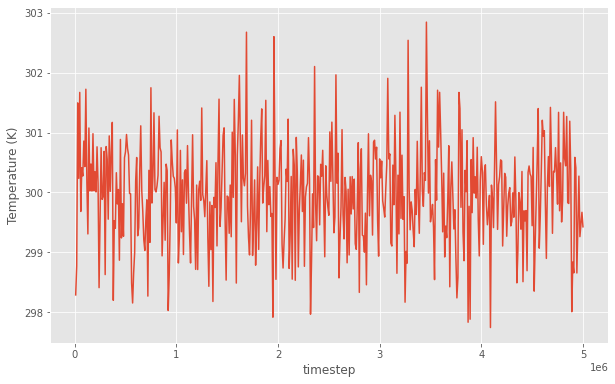

In [6]:
fig = matplotlib.figure.Figure(figsize=(10, 6.18))
ax = fig.add_subplot()
ax.plot(timestep, temperature_real*kTroom/kB)
ax.set_xlabel('timestep')
ax.set_ylabel('Temperature (K)')
fig

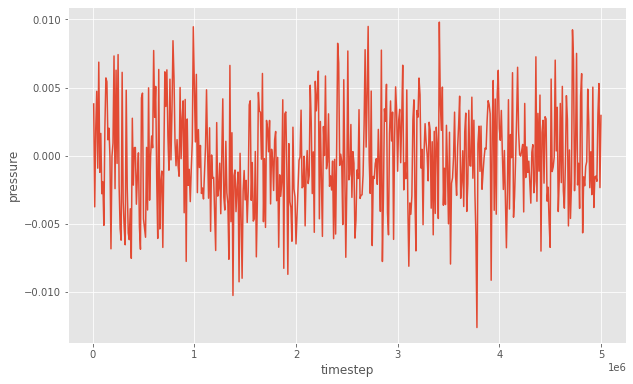

In [7]:
fig = matplotlib.figure.Figure(figsize=(10, 6.18))
ax = fig.add_subplot()
ax.plot(timestep, pressure)
ax.set_xlabel('timestep')
ax.set_ylabel('pressure')
fig